In [1]:
!featurize dataset download 049dda31-d6f9-42bb-b03d-e23b53c0ea33

100%|██████████████████████████████████████| 74.7M/74.7M [00:00<00:00, 532MiB/s]
🍬  下载完成，正在解压...
🏁  数据集已经成功添加


In [2]:
import os
import shutil
import random
from pathlib import Path

def split_dataset(src_base_path, dest_base_path, categories, train_ratio, valid_ratio, test_ratio):
    assert train_ratio + valid_ratio + test_ratio == 1, "Ratios should add up to 1."
    
    # 创建目录结构
    subfolders = ['train', 'valid', 'test']
    for subfolder in subfolders:
        for category in categories:
            os.makedirs(os.path.join(dest_base_path, subfolder, category), exist_ok=True)
    
    # 分配图片到训练集、验证集和测试集
    for category in categories:
        category_path = Path(src_base_path) / category
        image_files = list(category_path.glob('*.*'))
        
        random.shuffle(image_files)
        
        train_count = int(len(image_files) * train_ratio)
        valid_count = int(len(image_files) * valid_ratio)
        
        train_files = image_files[:train_count]
        valid_files = image_files[train_count:train_count + valid_count]
        test_files = image_files[train_count + valid_count:]
        
        for file in train_files:
            shutil.copy(file, os.path.join(dest_base_path, 'train', category, file.name))
        
        for file in valid_files:
            shutil.copy(file, os.path.join(dest_base_path, 'valid', category, file.name))
        
        for file in test_files:
            shutil.copy(file, os.path.join(dest_base_path, 'test', category, file.name))



In [3]:
src_base_path = 'data/Felidae/Felidae'
dest_base_path = 'pictures'
categories = ['Desert Cat', 'MaineCoon','Siberian Cats']
train_ratio, valid_ratio, test_ratio = 0.6, 0.2, 0.2

split_dataset(src_base_path, dest_base_path, categories, train_ratio, valid_ratio, test_ratio)

In [4]:
!pip install fastai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 141.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 159.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 137.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.4/922.4 kB 162.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 163.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 138.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 145.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install ipywidgets

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 113.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 153.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 137.7 MB/s eta 0:00:00


In [6]:
from fastai.vision.all import *
from fastai.vision.widgets import *

# 指定数据集路径
path = Path(dest_base_path)


In [7]:
item_tfms=Resize(224)
batch_tfms=aug_transforms()

In [8]:
dls = ImageDataLoaders.from_folder(path,
                                   train='train', 
                                   valid='valid', 
                                   seed=42, 
                                   item_tfms=item_tfms,
                                   batch_tfms=batch_tfms)

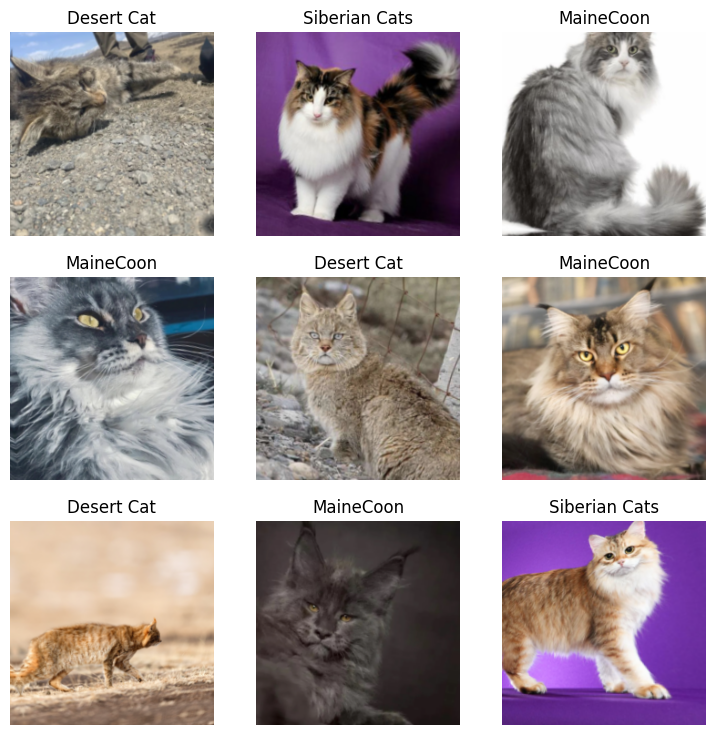

In [9]:
dls.show_batch()

In [10]:
arch = resnet18

In [11]:
learn = vision_learner(dls, arch, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/featurize/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 297MB/s]


SuggestedLRs(valley=0.0014454397605732083)

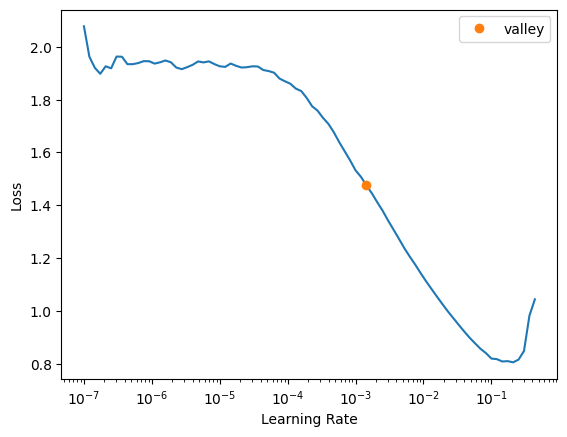

In [12]:
learn.lr_find()

In [13]:
learn.fine_tune(5, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,1.727257,1.504198,0.466667,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.985971,12.389683,0.333333,00:03
1,1.228311,22.674326,0.666667,00:03
2,1.976893,45.186672,0.500000,00:03
3,2.470650,267.359772,0.466667,00:03
4,2.228350,149.327621,0.533333,00:03


In [14]:
# fine tune the model
learn.fine_tune(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.553941,64.255409,0.533333,00:03


epoch,train_loss,valid_loss,accuracy,time
0,1.353974,35.263664,0.533333,00:03
1,1.136877,17.449148,0.533333,00:03
2,0.989243,7.988455,0.566667,00:03
3,0.812264,4.395454,0.766667,00:03
4,0.704885,3.127243,0.733333,00:03


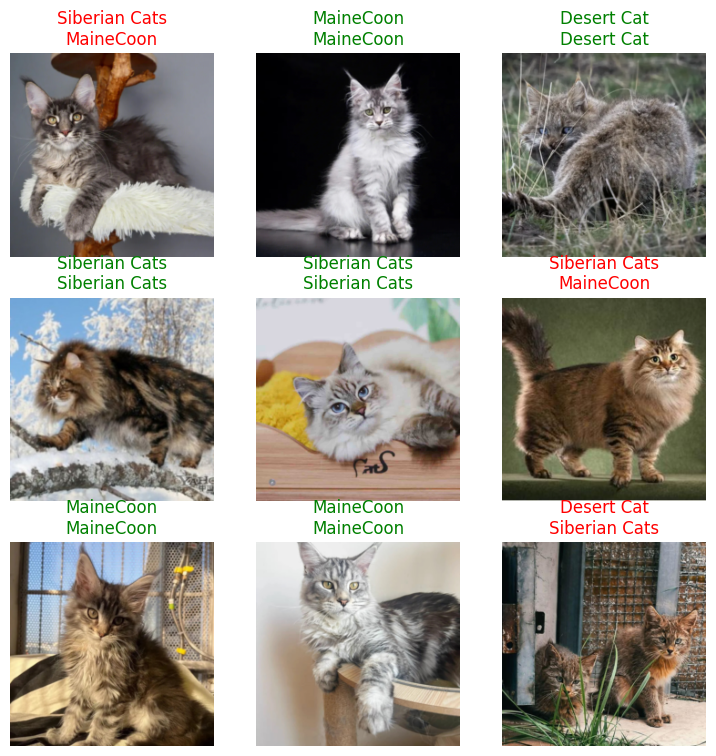

In [15]:
# show results
learn.show_results()

In [16]:
test_dl = dls.test_dl(get_image_files(path/'test'), with_labels=True)

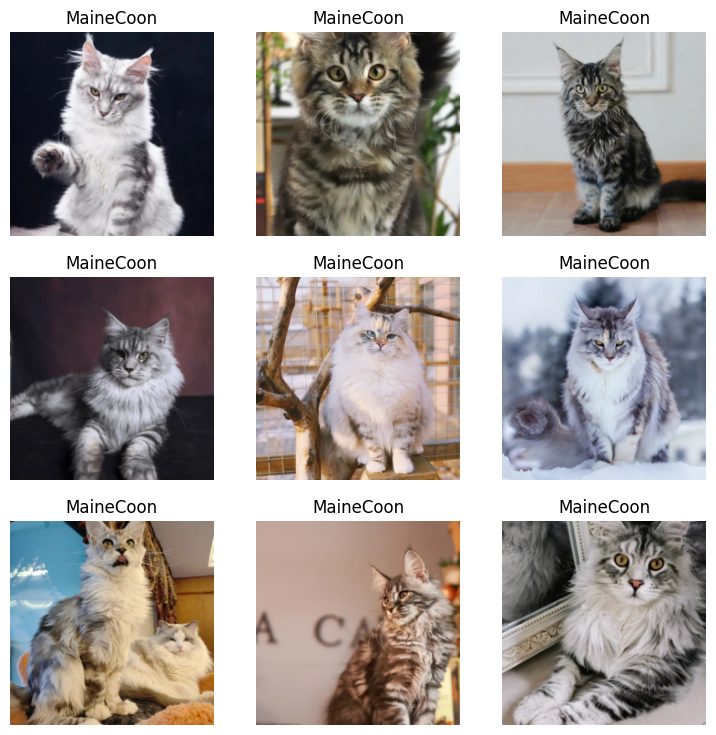

In [17]:
test_dl.show_batch()

In [18]:
# preds, targets, decodes = learn.get_preds(dl=test_dl, with_decoded=True)
preds, targets = learn.get_preds(dl=test_dl)

In [19]:
from fastai.tabular.all import *

In [20]:
accuracy(preds, targets)

TensorBase(0.3939)

In [30]:
# Create the interpretation object using the from_learner method
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)


In [24]:
learn.export('cats.pkl')

In [ ]:

# Show per-class metrics (e.g., precision, recall, F1-score)
interp.print_classification_report()


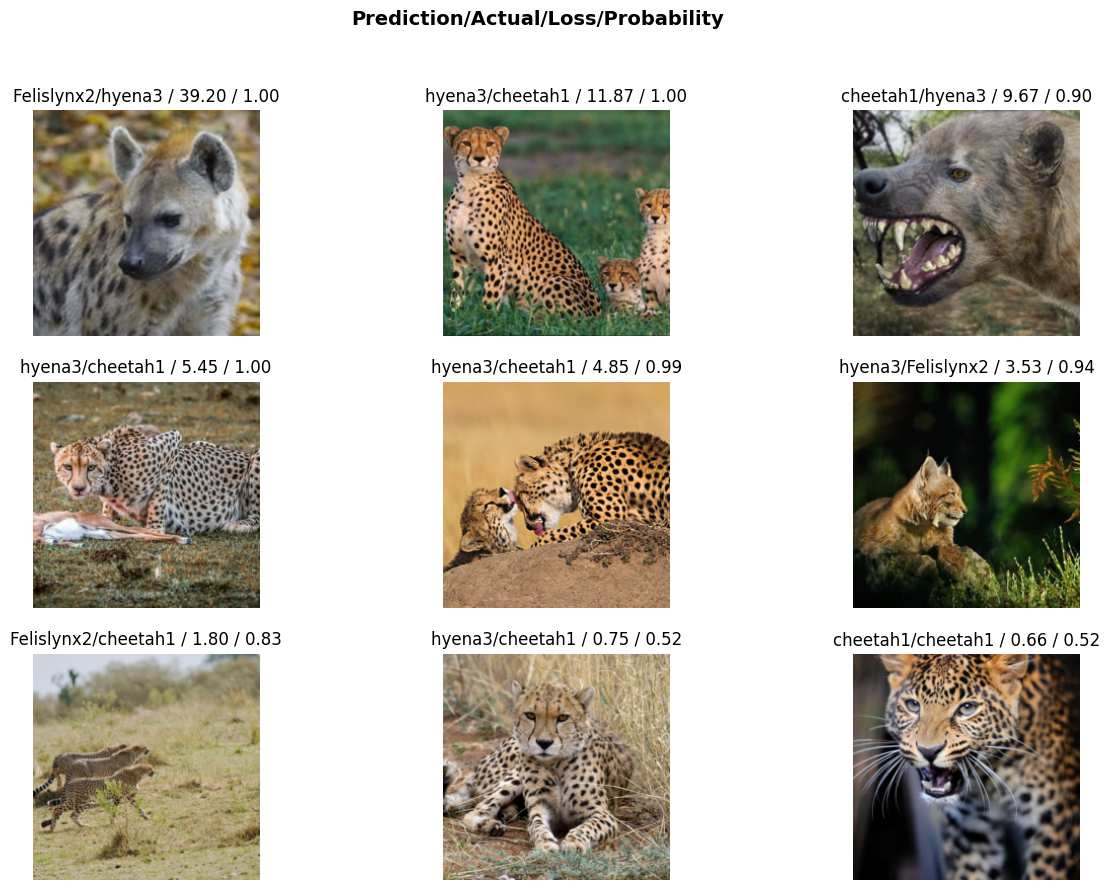

In [30]:
# display top losses
interp.plot_top_losses(9, figsize=(15,10))